In [32]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


In [33]:
img=cv2.imread('./test_images/image_43.jpeg')
img.shape


(168, 300, 3)

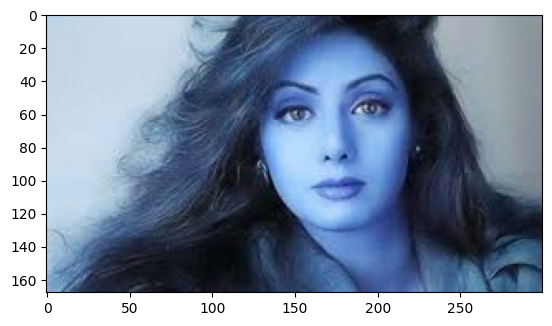

In [34]:
plt.imshow(img)

In [35]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

In [36]:
gray

array([[217, 217, 217, ..., 153, 153, 153],
       [217, 217, 217, ..., 153, 153, 153],
       [216, 216, 216, ..., 152, 152, 152],
       ...,
       [183, 180, 175, ..., 106, 110, 113],
       [181, 179, 176, ..., 104, 109, 113],
       [178, 177, 175, ..., 102, 108, 112]], dtype=uint8)

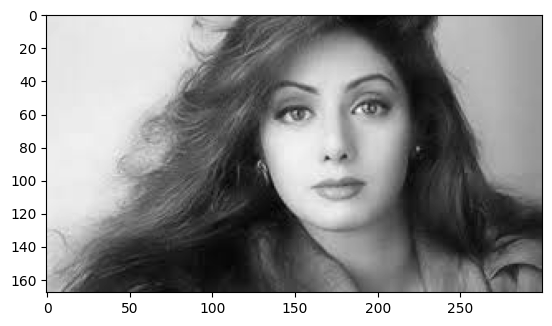

In [37]:
plt.imshow(gray,cmap='gray')

In [38]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[122,  18, 107, 107]], dtype=int32)

In [39]:
(x,y,w,h) = faces[0]
x,y,w,h

(122, 18, 107, 107)

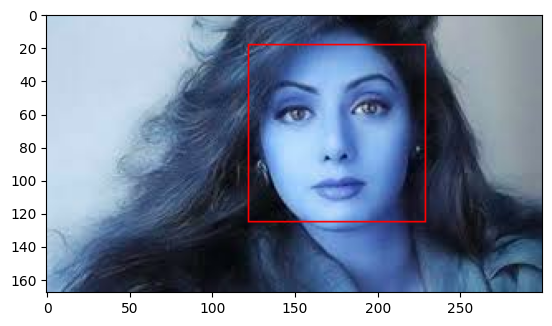

In [40]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),0)
plt.imshow(face_img)

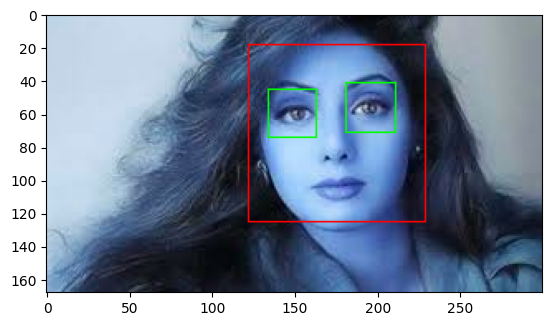

In [41]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


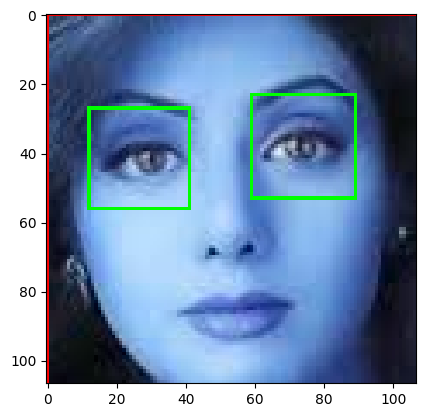

In [42]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [43]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


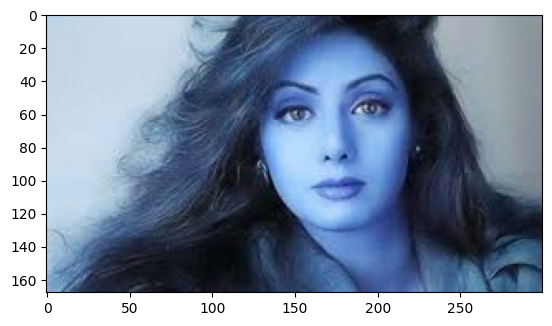

In [44]:
original_image = cv2.imread('./test_images/image_43.jpeg')
plt.imshow(original_image)

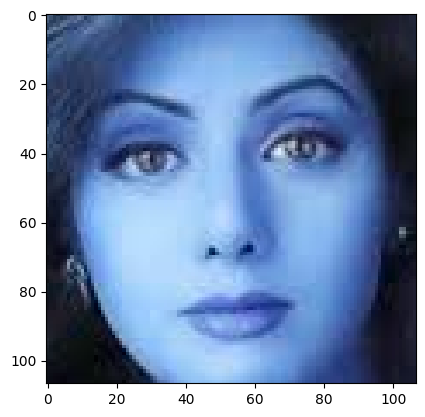

In [45]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/image_43.jpeg')
plt.imshow(cropped_image)

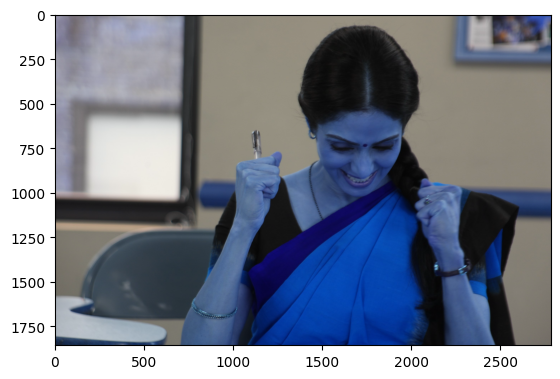

In [46]:
org_image_obstructed = cv2.imread('./test_images/sridevi3.jpg')
plt.imshow(org_image_obstructed)

In [47]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sridevi3.jpg')
cropped_image_no_2_eyes

In [48]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [49]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [50]:
img_dirs

['./dataset/rajnikanth', './dataset/amitabh_bachchan', './dataset/sridevi']

In [51]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [52]:
{
    'rajnikanth' : [
        './dataset/rajnikanth/download.jpeg',
        './dataset/rajnikanth/image_2.jpeg'
    ],
    'sridevi' : [
        './dataset/sridevi/image_16.jpeg'
        './dataset/sridevi/image_22.jpeg'
    ]

}

{'rajnikanth': ['./dataset/rajnikanth/download.jpeg',
  './dataset/rajnikanth/image_2.jpeg'],
 'sridevi': ['./dataset/sridevi/image_16.jpeg./dataset/sridevi/image_22.jpeg']}

In [53]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        #print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = f"{celebrity_name}_{count}.jpeg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1         

rajnikanth
Generating cropped images in folder:  ./dataset/cropped/rajnikanth
amitabh_bachchan
Generating cropped images in folder:  ./dataset/cropped/amitabh_bachchan
sridevi
Generating cropped images in folder:  ./dataset/cropped/sridevi


In [54]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

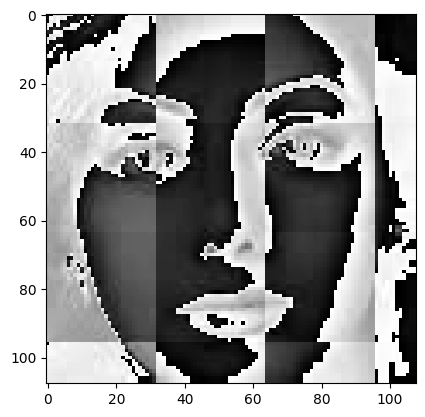

In [55]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [56]:
celebrity_file_names_dict

{'rajnikanth': ['./dataset/cropped/rajnikanth/rajnikanth_1.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_2.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_3.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_4.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_5.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_6.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_7.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_8.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_9.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_10.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_11.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_12.jpeg',
  './dataset/cropped/rajnikanth/rajnikanth_13.jpeg'],
 'amitabh_bachchan': ['./dataset/cropped/amitabh_bachchan/amitabh_bachchan_1.jpeg',
  './dataset/cropped/amitabh_bachchan/amitabh_bachchan_2.jpeg',
  './dataset/cropped/amitabh_bachchan/amitabh_bachchan_3.jpeg',
  './dataset/cropped/amitabh_bachchan/amitabh_bachchan_4.jpeg',
  './dataset/cropped/amitabh_

In [57]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'rajnikanth': 0, 'amitabh_bachchan': 1, 'sridevi': 2}

In [58]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [59]:
len(X)

58

In [60]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(58, 4096)

In [61]:
X[0]

array([ 44.,  53.,  40., ..., 202., 136.,  84.])

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7333333333333333

In [64]:
len(X_test)

15

In [65]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         1
           2       0.71      1.00      0.83        10

    accuracy                           0.73        15
   macro avg       0.57      0.42      0.41        15
weighted avg       0.74      0.73      0.66        15



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [66]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [67]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [68]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

,model,best_score,best_params
0,svm,0.811111,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.741667,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.747222,{'logisticregression__C': 1}


In [69]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [70]:
best_estimators['svm'].score(X_test,y_test)

0.6666666666666666

In [71]:
best_estimators['random_forest'].score(X_test,y_test)

0.5333333333333333

In [72]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [73]:
best_clf = best_estimators['svm']

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 3],
       [0, 0, 1],
       [1, 0, 9]])

Text(95.72222222222221, 0.5, 'Truth')

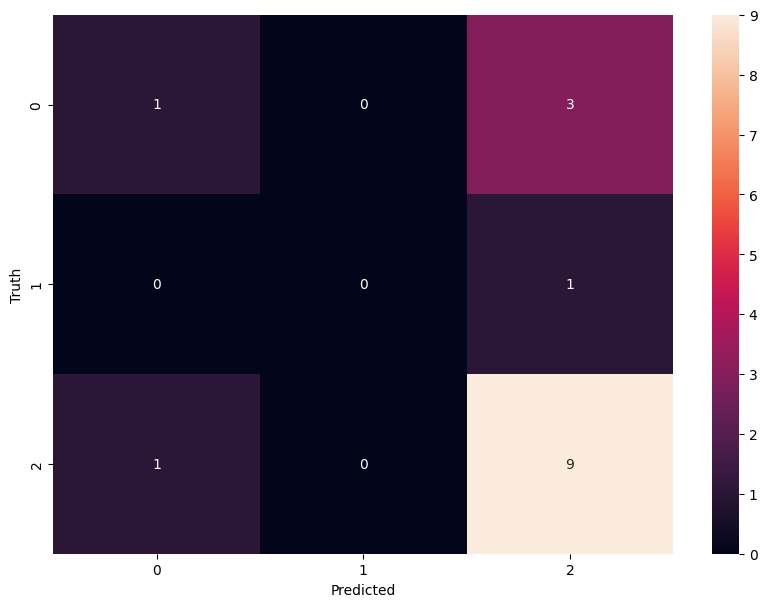

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
class_dict

{'rajnikanth': 0, 'amitabh_bachchan': 1, 'sridevi': 2}

In [77]:

!pip3 install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [78]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))